In [1]:
import pandas as pd


In [8]:
rankings_file_path = "Daily_Ranking.csv"
output_folder_path = "output_song_data"

In [9]:
particular_song_name = "Despacito - Remix"

In [10]:
df = pd.read_csv(rankings_file_path);
df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [14]:
song_d = df[df["Track Name"] == particular_song_name]
# song_d = song_d[song_d["Position"] < 50]
song_d["Inv_Pos"] = 200 - song_d["Position"]
new_song_d = song_d.drop(columns=['Track Name', 'Artist', 'URL'])
new_song_d.head()
new_song_d.to_csv("preprocess.csv")

/home/david1972/comp4462/comp4462/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df_countries = pd.read_json("countries.json")
df_countries = df_countries.transpose()
df_countries = df_countries.drop(columns=['continent', 'capital', 'languages', 'native', 'phone', 'currency'])
df_countries = df_countries.rename(columns={'name':'Country'})
df_countries.head()

,Country
AD,Andorra
AE,United Arab Emirates
AF,Afghanistan
AG,Antigua and Barbuda
AI,Anguilla


In [13]:
new_song_d['Region'] = new_song_d['Region'].str.upper()
song_d_countries = new_song_d.merge(df_countries, how='inner', left_on='Region', right_index=True)
song_d_countries.loc()

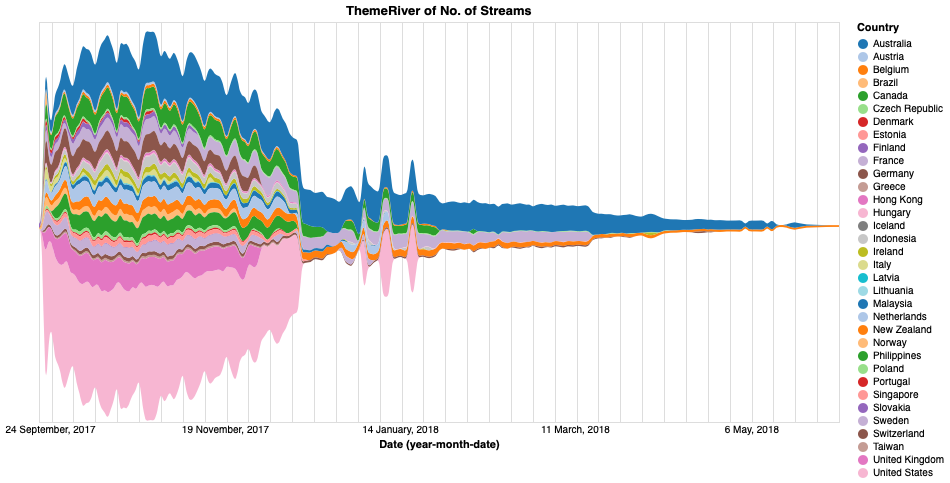

In [8]:
source = song_d_countries

base_chart = alt.Chart(source, width=800, height=400)
color_encoding = alt.Color('Country:N', scale=alt.Scale(scheme='category20'))
themeriver = base_chart.mark_area(interpolate='basis').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%e %B, %Y ', domain=False, tickSize=0)
    ),
    alt.Y('sum(Streams):Q', stack='center', axis=None),
    color_encoding
)

(themeriver).properties(title='ThemeRiver of No. of Streams').interactive()

In [9]:
#Need to calculate the day of max streams of the song for each country
song_max = song_d_countries.copy(deep=True)
song_max['max_streams'] = song_d_countries.groupby(["Country"])["Streams"].transform(max)
# song_max['max_streams_day'] = song_max[song_max['max_streams'] == song_max['Streams']]["Date"]
# song_max
max_streams_date = song_max[song_max['max_streams'] == song_max['Streams']][["Country", "Date"]]
max_streams_date = max_streams_date.rename(columns={'Date': 'Max_Date'})
# max_streams_date
merged_song_max = song_max.merge(max_streams_date, how='inner', left_on='Country', right_on='Country')
merged_song_max['is_max'] = (merged_song_max['Streams'] == merged_song_max['max_streams']).astype('int')
merged_song_max.head()

,Position,Streams,Date,Region,Inv_Pos,Country,max_streams,Max_Date,is_max
0,113,35972,2017-09-22,FR,87,France,56917,2017-12-02,0
1,194,23122,2017-09-23,FR,6,France,56917,2017-12-02,0
2,183,19756,2017-09-24,FR,17,France,56917,2017-12-02,0
3,174,21529,2017-09-25,FR,26,France,56917,2017-12-02,0
4,154,23498,2017-09-26,FR,46,France,56917,2017-12-02,0


# Trying to show label in the themeriver

Very difficult to do it from scratch, but somebody has made a library to do it in D3, but not Vega.
Weirdest bug: Can't change the color encoding for the labels, otherwise their positions get messed up

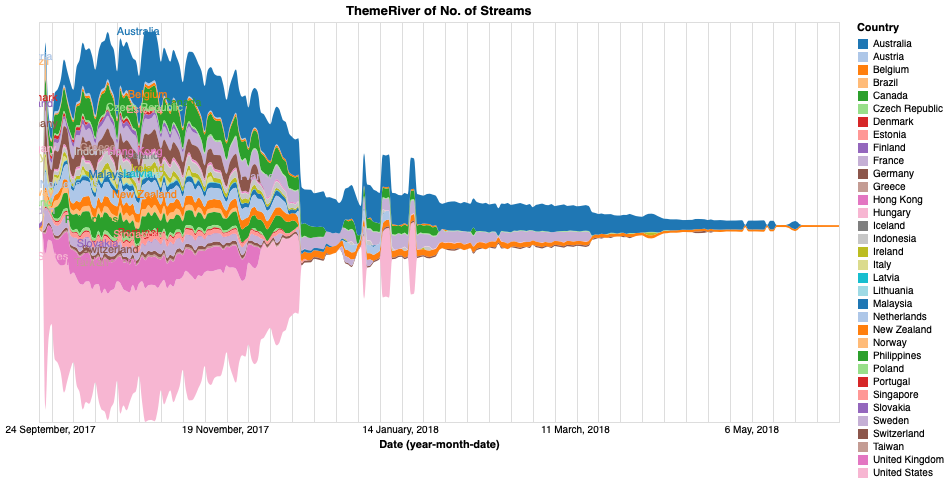

In [10]:
source = merged_song_max

base_chart = alt.Chart(source, width=800, height=400)
color_encoding = alt.Color('Country:N', scale=alt.Scale(scheme='category20'))
themeriver = base_chart.mark_area(interpolate='monotone').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%e %B, %Y ', domain=False, tickSize=0)
    ),
    alt.Y('sum(Streams):Q', stack='center', axis=None),
    color=color_encoding
)

opc = alt.Opacity('is_max:Q', scale=None)
color_encoding_2 = alt.Color('Country:N', scale=alt.Scale(scheme='category20b'))
country_labels = base_chart.mark_text(baseline='middle', dx=-10).encode(
    alt.X('yearmonthdate(Date):T'),
    alt.Y('sum(Streams):Q', stack='center', axis=None),
    text="Country:N",
    opacity=opc,
    color=color_encoding_2
)

(themeriver + country_labels).properties(title='ThemeRiver of No. of Streams').interactive()

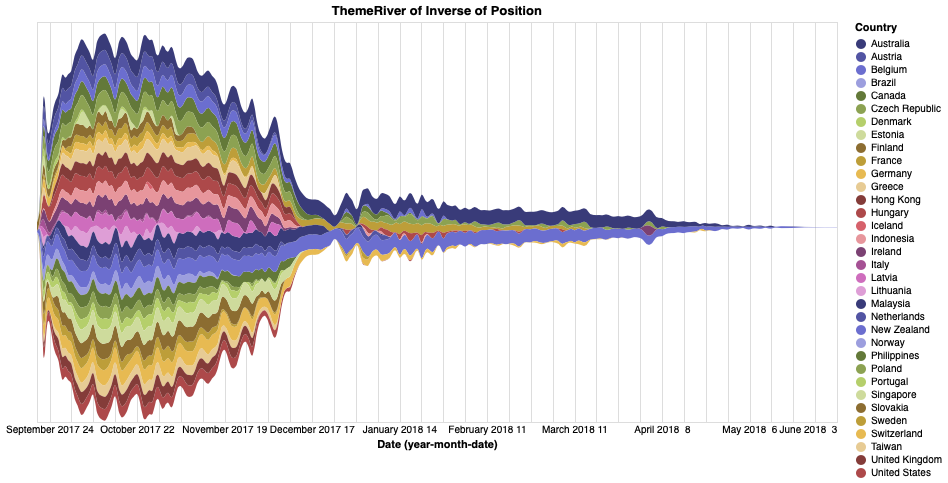

In [14]:
source = song_d_countries

alt.Chart(source, width=800, height=400).mark_area(interpolate='basis').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%B %Y %e', domain=False, tickSize=0)
    ),
    alt.Y('sum(Inv_Pos):Q', stack='center', axis=None),
    alt.Color('Country:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(title='ThemeRiver of Inverse of Position').interactive()

Similar, the above themeriver except trying to show the labels

In [12]:
#Need to calculate the day of max streams of the song for each country
song_max = song_d_countries.copy(deep=True)
song_max['max_pos'] = song_d_countries.groupby(["Country"])["Inv_Pos"].transform(max)
# song_max['max_streams_day'] = song_max[song_max['max_streams'] == song_max['Streams']]["Date"]
# song_max
max_streams_date = song_max[song_max['max_pos'] == song_max['Inv_Pos']][["Country", "Date"]]
max_streams_date = max_streams_date.rename(columns={'Date': 'Max_Date'})
# max_streams_date
merged_song_max = song_max.merge(max_streams_date, how='inner', left_on='Country', right_on='Country')
merged_song_max['is_max'] = (merged_song_max['Inv_Pos'] == merged_song_max['max_pos']).astype('int')
merged_song_max.head()

,Position,Streams,Date,Region,Inv_Pos,Country,max_pos,Max_Date,is_max
0,113,35972,2017-09-22,FR,87,France,116,2017-10-17,0
1,113,35972,2017-09-22,FR,87,France,116,2018-01-14,0
2,113,35972,2017-09-22,FR,87,France,116,2018-01-20,0
3,194,23122,2017-09-23,FR,6,France,116,2017-10-17,0
4,194,23122,2017-09-23,FR,6,France,116,2018-01-14,0


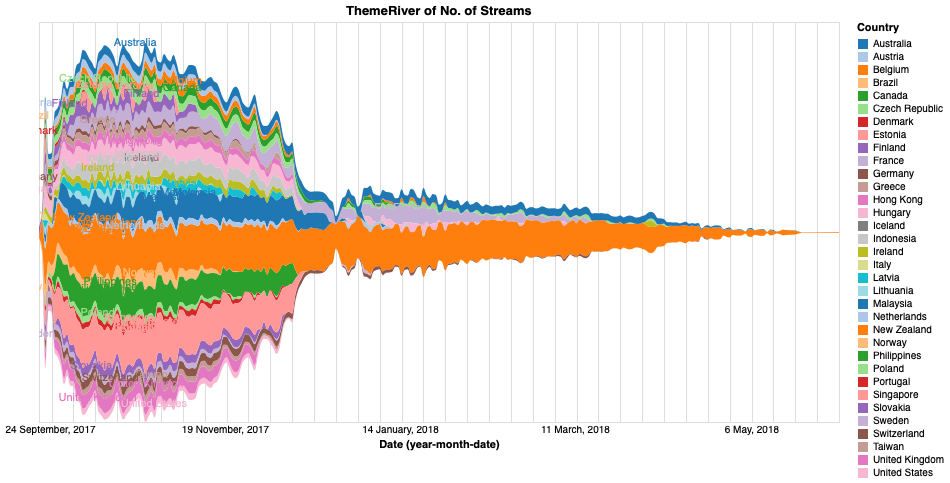

In [13]:
source = merged_song_max

base_chart = alt.Chart(source, width=800, height=400)
color_encoding = alt.Color('Country:N', scale=alt.Scale(scheme='category20'))
themeriver = base_chart.mark_area(interpolate='monotone').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%e %B, %Y ', domain=False, tickSize=0)
    ),
    alt.Y('sum(Inv_Pos):Q', stack='center', axis=None),
    color=color_encoding
)

opc = alt.Opacity('is_max:Q', scale=None)
color_encoding_2 = alt.Color('Country:N', scale=alt.Scale(scheme='category20b'))
country_labels = base_chart.mark_text(baseline='middle', dx=-10).encode(
    alt.X('yearmonthdate(Date):T'),
    alt.Y('sum(Inv_Pos):Q', stack='center', axis=None),
    text="Country:N",
    opacity=opc,
    color=color_encoding_2
)

(themeriver + country_labels).properties(title='ThemeRiver of No. of Streams').interactive()